In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import glob

## Alterando o tipo

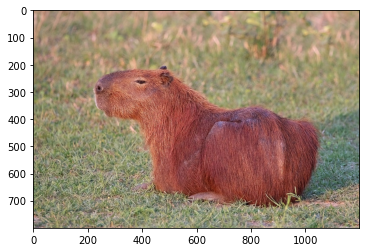

In [22]:
DATADIR = 'images/'
CATEGORIES = ['capybara','donkey']

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array[...,::-1])  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [25]:
print(img_array[...,::-1].shape)
print(img_array.shape)

(800, 1200, 3)
(800, 1200, 3)


In [23]:
print(img_array[...,::-1].shape)
print(img_array[...,::-1])

(800, 1200, 3)
[[[182 140 118]
  [183 141 119]
  [185 143 121]
  ...
  [163 161 102]
  [164 162 103]
  [165 163 104]]

 [[181 139 117]
  [183 141 119]
  [185 143 121]
  ...
  [161 159 100]
  [165 163 104]
  [168 166 107]]

 [[182 140 118]
  [183 141 119]
  [185 143 121]
  ...
  [165 160 104]
  [171 166 110]
  [176 171 115]]

 ...

 [[137 115  92]
  [121 103  81]
  [120 103  85]
  ...
  [163 154 121]
  [160 151 118]
  [151 142 109]]

 [[133 109  85]
  [128 108  84]
  [121 103  83]
  ...
  [161 151 116]
  [163 153 118]
  [149 139 104]]

 [[113  89  63]
  [113  91  67]
  [102  84  64]
  ...
  [168 158 122]
  [172 159 124]
  [155 142 107]]]


In [24]:
print(img_array.shape)
print(img_array)

(800, 1200, 3)
[[[118 140 182]
  [119 141 183]
  [121 143 185]
  ...
  [102 161 163]
  [103 162 164]
  [104 163 165]]

 [[117 139 181]
  [119 141 183]
  [121 143 185]
  ...
  [100 159 161]
  [104 163 165]
  [107 166 168]]

 [[118 140 182]
  [119 141 183]
  [121 143 185]
  ...
  [104 160 165]
  [110 166 171]
  [115 171 176]]

 ...

 [[ 92 115 137]
  [ 81 103 121]
  [ 85 103 120]
  ...
  [121 154 163]
  [118 151 160]
  [109 142 151]]

 [[ 85 109 133]
  [ 84 108 128]
  [ 83 103 121]
  ...
  [116 151 161]
  [118 153 163]
  [104 139 149]]

 [[ 63  89 113]
  [ 67  91 113]
  [ 64  84 102]
  ...
  [122 158 168]
  [124 159 172]
  [107 142 155]]]


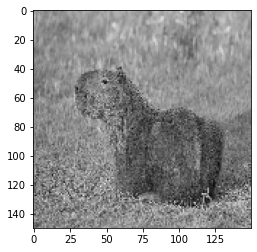

In [10]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

## Resize

In [86]:
inputFolder = 'img/capivara'
os.mkdir('img/resized capivara')

i=0

for img in glob.glob(inputFolder + "/*.jpeg"):
    image = cv2.imread(img)
    imgResized = cv2.resize(image, (150, 150))
    cv2.imwrite("img/resized capivara/image%04i.jpeg" %i, imgResized)

    i +=1
    #cv2.imshow('image', imgResized)
    #cv2.waitKey(30)

In [87]:
inputFolder = 'img/burro'
os.mkdir('img/resized burro')

i=0

for img in glob.glob(inputFolder + "/*.jpeg"):
    image = cv2.imread(img)
    imgResized = cv2.resize(image, (150, 150))
    cv2.imwrite("img/resized burro/image%04i.jpeg" %i, imgResized)

    i +=1
    #cv2.imshow('image', imgResized)
    #cv2.waitKey(30)

In [36]:
for i in range(475,568):
    new_img = Image.open('images/capybara/capybara ('+str(i+1)+').jpg')
    new_img = new_img.convert('RGB')
    new_img.save('img/capivara/capivara'+str(i)+'.jpeg')

In [37]:
for i in range(0,337):
    new_img = Image.open('images/donkey/donkey ('+str(i+1)+').jpg')
    new_img = new_img.convert('RGB')
    new_img.save('img/burro/burro'+str(i)+'.jpeg')

C:\Users\malta\anaconda3\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


## Normalização e augmentation

In [5]:
size = 150
batch_size = 32
img_height = size
img_width = size

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
print(ds_train.cardinality())

tf.Tensor(26, shape=(), dtype=int64)


In [26]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    "img/",
    labels="inferred",
    label_mode="int",  # categorical, binary
    # class_names=['0', '1', '2', '3', ...]
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="training",
)

Found 904 files belonging to 2 classes.
Using 814 files for training.


In [27]:
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    "img/",
    labels="inferred",
    label_mode="int",  # categorical, binary
    # class_names=['0', '1', '2', '3', ...]
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="validation",
)

Found 904 files belonging to 2 classes.
Using 90 files for validation.


In [28]:
print("Number of training samples: %d" % tf.data.experimental.cardinality(ds_train))
print("Number of validation samples: %d" % tf.data.experimental.cardinality(ds_validation))

Number of training samples: 26
Number of validation samples: 3


NameError: name 'shape' is not defined

In [13]:
def augment(x, y):
    image = tf.image.random_brightness(x, max_delta=0.05)
    return image, y

In [29]:
ds_train = ds_train.map(augment)

In [30]:
# Custom Loops
for epochs in range(10):
    for x, y in ds_train:
        # train here
        pass

In [62]:
model = keras.Sequential(
    [
        layers.Input((28, 28, 1)),
        layers.Conv2D(16, 3, padding="same"),
        layers.Conv2D(32, 3, padding="same"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(10),
    ]
)


In [63]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=[keras.losses.SparseCategoricalCrossentropy(from_logits=True),],
    metrics=["accuracy"],
)

model.fit(ds_train, epochs=10, verbose=2)

Epoch 1/10
26/26 - 5s - loss: 18.7131 - accuracy: 0.5405 - 5s/epoch - 186ms/step
Epoch 2/10
26/26 - 2s - loss: 6.1649 - accuracy: 0.6548 - 2s/epoch - 82ms/step
Epoch 3/10
26/26 - 2s - loss: 4.5198 - accuracy: 0.6732 - 2s/epoch - 83ms/step
Epoch 4/10
26/26 - 2s - loss: 2.2173 - accuracy: 0.7690 - 2s/epoch - 86ms/step
Epoch 5/10
26/26 - 2s - loss: 1.3402 - accuracy: 0.8133 - 2s/epoch - 91ms/step
Epoch 6/10
26/26 - 2s - loss: 0.5243 - accuracy: 0.8845 - 2s/epoch - 88ms/step
Epoch 7/10
26/26 - 2s - loss: 0.2853 - accuracy: 0.9226 - 2s/epoch - 93ms/step
Epoch 8/10
26/26 - 2s - loss: 0.2556 - accuracy: 0.9472 - 2s/epoch - 89ms/step
Epoch 9/10
26/26 - 2s - loss: 0.1911 - accuracy: 0.9521 - 2s/epoch - 81ms/step
Epoch 10/10
26/26 - 2s - loss: 0.0740 - accuracy: 0.9754 - 2s/epoch - 89ms/step


In [16]:
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1),]
)

In [35]:
images[0][:,:,0]

<tf.Tensor: shape=(150, 150), dtype=float32, numpy=
array([[255.02666, 254.02666, 254.02666, ..., 254.02666, 255.02666,
        255.02666],
       [255.02666, 254.02666, 254.02666, ..., 254.02666, 255.02666,
        254.02666],
       [255.02666, 254.02666, 255.02666, ..., 254.02666, 255.02666,
        254.02666],
       ...,
       [254.02666, 255.02666, 253.02666, ..., 250.02666, 253.02666,
        255.02666],
       [253.02666, 255.02666, 255.02666, ..., 251.02666, 255.02666,
        255.02666],
       [255.02666, 255.02666, 254.02666, ..., 253.02666, 254.02666,
        255.02666]], dtype=float32)>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


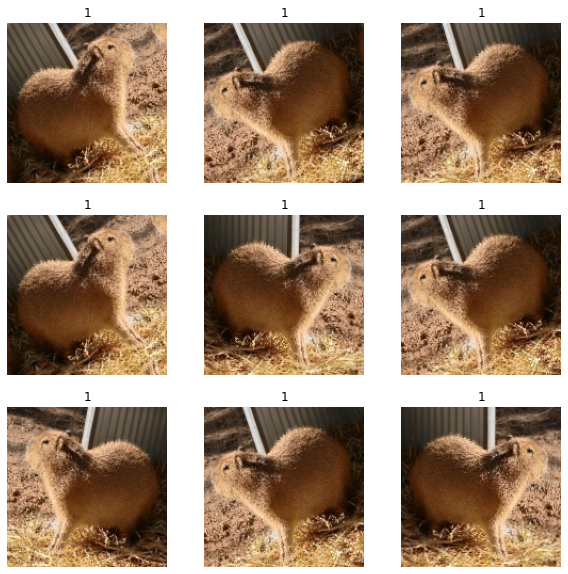

In [36]:
for images, labels in ds_train.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]/255.0
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0])
        plt.title(int(labels[0]))
        plt.axis("off")